In [ ]:
from google.colab import drive
drive.mount('/content/drive')
rpart = "/content/drive/My Drive/R part/majzara_tweets.csv"

MessageError: ignored

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#TOOK 1 MINUTE TO RUN
sitin2 <- read.csv("/content/drive/MyDrive/R part/majzara_tweets.csv")
maj1 <- read.csv("/content/drive/MyDrive/R part/majzara_tweets.csv")
maj2 <- read.csv("/content/drive/MyDrive/R part/majzara_tweets2.csv")
shahdeedtweets <- read.csv("/content/drive/MyDrive/R part/shaeehd.csv")
modn <- read.csv("/content/drive/MyDrive/R part/modnalsudan_tweets.csv")
silmeeya <- read.csv("/content/drive/MyDrive/R part/silmeeya.csv")
silah <- read.csv("/content/drive/MyDrive/R part/silah.csv")
royalcare <- read.csv("/content/drive/MyDrive/R part/royalcare.csv")
sudanrevolts <- read.csv("/content/drive/MyDrive/R part/sudanrevoluts.csv")
mawakibmarch <- read.csv("/content/drive/MyDrive/R part/mawakibmarch.csv")
mawakibfebruary <- read.csv("/content/drive/MyDrive/R part/mawakibfebruary.csv")
mawakibjuanuary <- read.csv("/content/drive/MyDrive/R part/mawakibjuanuary.csv")
newmawakibjanuary<-subset(mawakibjuanuary, grepl("RT", mawakibjuanuary[["text"]]) == FALSE) 
shohdadata <- read.csv('/content/drive/MyDrive/R part/Demographics dataset2.csv')
tasgot <- read.csv("/content/drive/MyDrive/R part/tasgod.csv")



In [ ]:
%%R
sudatweets <- rbind(sitin2, maj1, maj2, modn, silmeeya, silah, royalcare, sudanrevolts, mawakibmarch,newmawakibjanuary, mawakibfebruary, tasgot)

In [ ]:
%%R
sudatweets <- sudatweets[, -c(1)]

colnames(sudatweets)

 [1] "author_id"          "username"           "author_followers"  
 [4] "author_tweets"      "author_description" "author_location"   
 [7] "text"               "created_at"         "retweets"          
[10] "replies"            "likes"              "quote_count"       


In [ ]:
%%R
library(tidyverse)
#create an ID coloumn in the data
sudatweets <- tibble::rowid_to_column(sudatweets, "X")


✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
%%R
sudatweets <- sudatweets[sample(1:nrow(sudatweets), 150000
),] 

In [ ]:
%%R
sudatweetsdiscourses <- sudatweets[, c("X", "text")]
#saving the sample to predict their dicsourses 
#write.csv(sudatweetsdiscourses, "tweetsdiscourses.csv", row.names=FALSE)

In [ ]:
%%R
install.packages("writexl")
library("writexl")
write_xlsx(sudatweetsdiscourses, "/content/drive/MyDrive/R part/sampleforclassification.xlsx" )

(as ‘lib’ is unspecified)







	‘/tmp/RtmpCtK1Pa/downloaded_packages’



In [ ]:
%%R
colnames(sudatweets)

 [1] "Text"               "Discourse"          "X"                 
 [4] "author_id"          "username"           "author_followers"  
 [7] "author_tweets"      "author_description" "author_location"   
[10] "text"               "created_at"         "retweets"          
[13] "replies"            "likes"              "quote_count"       
[16] "tweet_time"        


In [ ]:
%%R
colnames(shohdadata)[2] <- "text"

In [ ]:
%%R
shohdadata$Date.of.Death <- as.Date(shohdadata$Date.of.Death, format = "%d/%m/%Y")
sudatweets$tweet_time <-as.Date(sudatweets$created_at)
shohdadata$quere_end <- shohdadata$Date.of.Death +14

In [ ]:
%%R
shohdadata<- shohdadata[complete.cases(shohdadata$Date.of.Death),]
shohdadata<- shohdadata[complete.cases(shohdadata$Age),]

In [ ]:
%%R
nrow(shohdadata)

[1] 160


In [ ]:
%%R
library(lubridate)
tweetsdf <- sudatweets[FALSE,]
#took 1:33 minutes to run
for (i in 1:160){
data_new <- sudatweets[sudatweets$tweet_time >= shohdadata$Date.of.Death[i] &    # Extract data frame subset
                   sudatweets$tweet_time <= shohdadata$quere_end[i],]
data_new <- data_new%>%mutate(person = shohdadata$text[i])
tweetsdf <- rbind(tweetsdf, data_new)
print(i)
#write.csv(tweetsdf, "tweetsdf50.csv")
}

Attaching package: ‘lubridate’



    date, intersect, setdiff, union




[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [ ]:
%%R
colnames(sudatweets)

 [1] "Text"               "Discourse"          "X"                 
 [4] "author_id"          "username"           "author_followers"  
 [7] "author_tweets"      "author_description" "author_location"   
[10] "text"               "created_at"         "retweets"          
[13] "replies"            "likes"              "quote_count"       
[16] "tweet_time"        


In [ ]:
%%R
nrow(tweetsdf)
#head(tweetsdf)
#1913823

[1] 1913823


In [ ]:
%%R
colnames(sudatweets)

 [1] "Text"               "Discourse"          "X"                 
 [4] "author_id"          "username"           "author_followers"  
 [7] "author_tweets"      "author_description" "author_location"   
[10] "text"               "created_at"         "retweets"          
[13] "replies"            "likes"              "quote_count"       
[16] "tweet_time"        


In [ ]:
%%R
install.packages("fuzzyjoin")
library(fuzzyjoin)
library(stats)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpfNF24C/downloaded_packages’



In [ ]:
%%R
#took 3:04 minutes to run
testingmerge <- tweetsdf %>% regex_inner_join(shohdadata, by = "text")
testingmerge <- testingmerge%>%mutate(mention = "Yes")


In [ ]:
%%R
nrow(sudatweets)

[1] 150000


In [ ]:
%%R
colnames(testingmerge)
#testingmerge2 <- testingmerge[c("X","person.x", "mention")] This is for two names 
testingmerge2 <- testingmerge[c("X","person", "mention")]


In [ ]:
%%R
colnames(testingmerge2)[2] <- "person"
nrow(testingmerge2)

[1] 1189


In [ ]:
%%R
colnames(shohdadata)[2] <- "person"
head(shohdadata)

  ID                     person Gender Age Death.location Residence   Injury
1  1 محمد محمود فضل المولي سعيد   Male  38       بيست كير   Wilayat طلق ناري
2  2            محمد عيسي ماكور   Male  30           بربر   Wilayat طلق ناري
3  3       مختار عبدالله صالحين   Male  33          عطبرة   Wilayat طلق ناري
4  4           مأمون محمد الخير   Male  40           بربر   Wilayat طلق ناري
5  5       عثمان سليمان اللبوتة   Male  30          كريمة   Wilayat طلق ناري
6  6              عاصم علي حسين   Male  20          عطبرة   Wilayat طلق ناري
  Injury.location Date.of.injury Date.of.Death Marital.status Origional.place
1           الرأس       4/6/2019    2019-06-04     متزوج و أب                
2           الرأس     20/12/2018    2018-12-20      غير متزوج            Arab
3           الصدر      11/4/2019    2019-04-11     متزوج و أب            Arab
4    الصدر والبطن     20/12/2018    2018-12-21     متزوج و أب            Arab
5           الرأس     20/12/2018    2019-01-01      غير متزوج          

In [ ]:
%%R
trymerge <-left_join(tweetsdf, testingmerge2, by = c("X", "person"))
nrow(trymerge)

[1] 1913828


In [ ]:
%%R
trymerge["mention"][is.na(trymerge["mention"])] <- "No"

In [ ]:
%%R
table(trymerge$mention)


     No     Yes 
1912635    1193 


In [ ]:
%%R
trymerge2 <- sudatweets %>% regex_inner_join(shohdadata, by = "text")

[1] 185


In [ ]:
%%R
colnames(shohdadata)[2] <- "person"

In [ ]:
%%R
trymerge <- left_join(trymerge, shohdadata, by = "person")

In [ ]:
%%R
library(nnet)
colnames(trymerge)

 [1] "Text"                  "Discourse"             "X"                    
 [4] "author_id"             "username"              "author_followers"     
 [7] "author_tweets"         "author_description"    "author_location"      
[10] "text"                  "created_at"            "retweets"             
[13] "replies"               "likes"                 "quote_count"          
[16] "tweet_time"            "person"                "mention"              
[19] "ID"                    "Gender"                "Age"                  
[22] "Death.location"        "Residence"             "Injury"               
[25] "Injury.location"       "Date.of.injury"        "Date.of.Death"        
[28] "Marital.status"        "Origional.place"       "Political.affiliation"
[31] "Other"                 "quere_end"            


In [ ]:
%%R
trymerge <- trymerge%>%mutate(agedummy = case_when(Age <= 30 ~ "Youth", Age > 30 ~ "old") )

In [ ]:
%%R
trymerge$Residence <- gsub("Wilayat", "outsidekhartoum", trymerge$Residence)

In [ ]:
%%R
colnames(trymerge)[29] <- "Ethnicity"

In [ ]:
%%R
#trymerge <- trymerge[complete.cases(trymerge$Origional.place ),]
trymerge <- trymerge%>%filter(Ethnicity %in% c("African", "Arab"))

In [ ]:
%%R
m11 <- glm(as.factor(mention) ~Gender+Age+ Political.affiliation+Residence+ Race , data = trymerge, family = "binomial")
summary(m11)


Call:
glm(formula = as.factor(mention) ~ Gender + Age + Political.affiliation + 
    Residence + Race, family = "binomial", data = trymerge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.0707  -0.0526  -0.0364  -0.0303   4.0691  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.122111   0.302107 -23.575  < 2e-16 ***
GenderMale                0.242630   0.278653   0.871 0.383905    
Age                       0.017424   0.002999   5.810 6.25e-09 ***
Political.affiliationyes -0.505320   0.135038  -3.742 0.000183 ***
Residenceoutsidekhartoum -1.085943   0.078733 -13.793  < 2e-16 ***
RaceArab                 -0.156360   0.076993  -2.031 0.042270 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13643  on 948789  degrees of freedom
Residual deviance: 13373  on 948784  degrees of freedom
AIC: 13385

Number of 

In [ ]:
%%R
trymerge = trymerge%>% mutate(mention.factor = as.factor(mention))
trymerge = trymerge %>% mutate(mention.ref = relevel(mention.factor, ref = "Yes"))
class(trymerge$mention.factor)

[1] "factor"


In [ ]:
%%R
m12 <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity , data = trymerge, family = "binomial")
summary(m12)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity, family = "binomial", data = trymerge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0691   0.0303   0.0364   0.0526   0.0707  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               7.122111   0.302107  23.575  < 2e-16 ***
GenderMale               -0.242630   0.278653  -0.871 0.383905    
Age                      -0.017424   0.002999  -5.810 6.25e-09 ***
Political.affiliationyes  0.505320   0.135038   3.742 0.000183 ***
Residenceoutsidekhartoum  1.085943   0.078733  13.793  < 2e-16 ***
EthnicityArab             0.156360   0.076993   2.031 0.042270 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13643  on 948789  degrees of freedom
Residual deviance: 13373  on 948784  degrees of freedom
AIC: 13385

Number of Fi

In [ ]:
%%R
install.packages("pscl")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpSbY4xC/downloaded_packages’



In [ ]:
%%R
library(pscl)
pR2(m13)
#1.980199e-02 for m12
#2.154723e-02 for m13

fitting null model for pseudo-r2
          llh       llhNull            G2      McFadden          r2ML 
-6.674697e+03 -6.821686e+03  2.939769e+02  2.154723e-02  3.097960e-04 
         r2CU 
 2.169916e-02 


In [ ]:
%%R
m13 <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity+ Residence*Ethnicity , data = trymerge, family = "binomial")
summary(m13)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity + Residence * Ethnicity, family = "binomial", 
    data = trymerge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0598   0.0305   0.0374   0.0508   0.0686  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             6.949646   0.302902  22.944  < 2e-16
GenderMale                             -0.203041   0.278487  -0.729    0.466
Age                                    -0.017623   0.003014  -5.848 4.99e-09
Political.affiliationyes                0.525788   0.134928   3.897 9.75e-05
Residenceoutsidekhartoum                1.740972   0.169791  10.254  < 2e-16
EthnicityArab                           0.362851   0.086639   4.188 2.81e-05
Residenceoutsidekhartoum:EthnicityArab -0.880189   0.189984  -4.633 3.60e-06
                                          
(Intercept)                            ***


In [ ]:
%%R
m12odds <-as.data.frame(exp(coef(m12)))
m13odds <-as.data.frame(exp(coef(m13)))

In [ ]:
%%R
colnames(plottingdf)

 [1] "X"                     "author_id"             "username"             
 [4] "author_followers"      "author_tweets"         "author_description"   
 [7] "author_location"       "text"                  "created_at"           
[10] "retweets"              "replies"               "likes"                
[13] "quote_count"           "tweet_time"            "person"               
[16] "mention"               "ID"                    "Gender"               
[19] "Age"                   "Death.location"        "Residence"            
[22] "Injury"                "Injury.location"       "Date.of.injury"       
[25] "Date.of.Death"         "Marital.status"        "Race"                 
[28] "Political.affiliation" "Other"                 "quere_end"            
[31] "mention.factor"        "mention.ref"           "Month"                
[34] "month"                


In [ ]:
%%R
library(ggplot2)
library(tidyverse)
plottingdf <- trymerge%>%dplyr::filter(mention == "Yes")


In [ ]:
%%R
library(lubridate)
plottingdf$month = format(as.Date(plottingdf$created_at), "%y-%m")
#class(plottingdf$created_at)
table(plottingdf$month)


18-12 19-01 19-02 19-03 19-04 19-05 19-06 19-07 
   82   460    47     5   116     2    97     9 


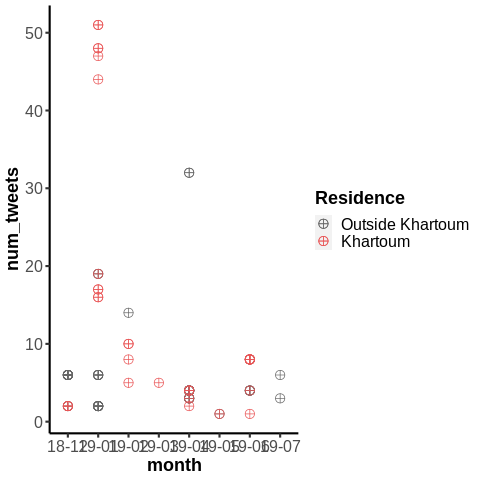

In [ ]:
%%R
ggplot(plt1, aes(x = month, y= num_tweets))+
  geom_point(data=subset(plt1, Residence == "Wilayat"), aes(color="gray40"), shape=10, size=4)+
  geom_point(data=subset(plt1, Residence == "Khartoum"), aes(color="red"), shape=10, size=4)+
   scale_colour_manual(name = 'Residence', values =c('gray40'='gray40','red'='#E95556'), labels = c('Outside Khartoum','Khartoum'))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        panel.background = element_blank(), axis.line.x = element_line(size=1, colour = "black"), 
        axis.line.y = element_line(size=1, colour = "black"), axis.ticks = element_line(size=1), 
        axis.ticks.length = unit(.15, "cm"),  
        axis.text=element_text(size=16), 
        axis.title=element_text(size=18,face="bold"), 
        legend.title = element_text(colour="black", size=18, face="bold"), 
        legend.text = element_text(colour="black", size = 16))


In [ ]:
%%R
colnames(plt1)[14] <- "Race"

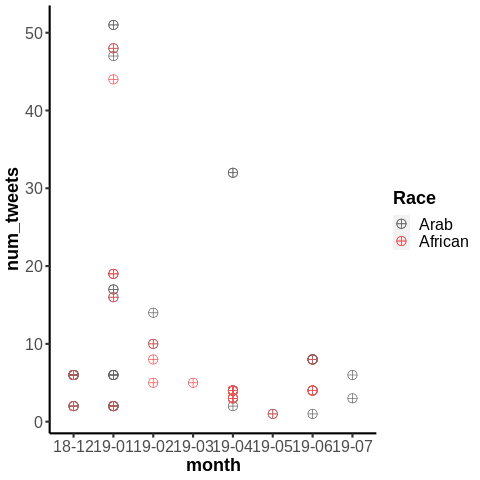

In [ ]:
%%R
ggplot(plt1, aes(x = month, y= num_tweets))+
  geom_point(data=subset(plt1, Race == "Arab"), aes(color="gray40"), shape=10, size=4)+
  geom_point(data=subset(plt1, Race == "African"), aes(color="red"), shape=10, size=4)+
   scale_colour_manual(name = 'Race', values =c('gray40'='gray40','red'='#E95556'), labels = c('Arab','African'))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        panel.background = element_blank(), axis.line.x = element_line(size=1, colour = "black"), 
        axis.line.y = element_line(size=1, colour = "black"), axis.ticks = element_line(size=1), 
        axis.ticks.length = unit(.15, "cm"),  
        axis.text=element_text(size=16), 
        axis.title=element_text(size=18,face="bold"), 
        legend.title = element_text(colour="black", size=18, face="bold"), 
        legend.text = element_text(colour="black", size = 16))

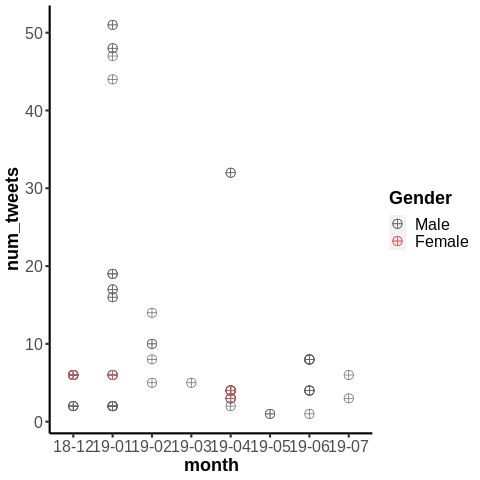

In [ ]:
%%R
ggplot(plt1, aes(x = month, y= num_tweets))+
  geom_point(data=subset(plt1, Gender == "Male"), aes(color="gray40"), shape=10, size=4)+
  geom_point(data=subset(plt1, Gender == "Female"), aes(color="red"), shape=10, size=4)+
   scale_colour_manual(name = 'Gender', values =c('gray40'='gray40','red'='#E95556'), labels = c('Male','Female'))+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        panel.background = element_blank(), axis.line.x = element_line(size=1, colour = "black"), 
        axis.line.y = element_line(size=1, colour = "black"), axis.ticks = element_line(size=1), 
        axis.ticks.length = unit(.15, "cm"),  
        axis.text=element_text(size=16), 
        axis.title=element_text(size=18,face="bold"), 
        legend.title = element_text(colour="black", size=18, face="bold"), 
        legend.text = element_text(colour="black", size = 16))

In [ ]:
%%R
nrow(trymerge%>%filter(mention == "Yes"))

[1] 818


In [ ]:
%%R
install.packages("writexl")
library("writexl")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpGq4COb/downloaded_packages’



In [ ]:
%%R
library(ggplot2) 
install.packages("descr")
library(descr) 
install.packages("pander")
library(pander) 
install.packages("texreg")
library(texreg) 
install.packages("MASS")
require(MASS)


(as ‘lib’ is unspecified)














	‘/tmp/RtmpfNF24C/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/RtmpfNF24C/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfNF24C/downloaded_packages’

Date:     2022-04-06
Author:   Philip Leifeld (University of Essex)

Consider submitting praise using the praise or praise_interactive functions.
Please cite the JSS article in your publications -- see citation("texreg").

Attaching package: ‘texreg’



    extract


(as ‘lib’ is unspecified)







	‘/tmp/RtmpfNF24C/downloaded_packages’


Attaching package: ‘MASS’



    select




In [ ]:
%%R 

install.packages("texreg")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpSbY4xC/downloaded_packages’



In [ ]:
%%R
library(texreg)
#"Residence(OutsideKhartoum)*Race(Arab)"
screenreg(m_announcementint , digits=3, file = "/content/drive/MyDrive/R part/m_announcementintfinal.doc", label="table:comment.effect",  
          custom.model.names=c("Logistic Regression Model for Sympathy discourses"), 
          custom.coef.names = c("Intercept", "Gender(Male)",  
                                "Age","Political Affiliation(yes)", "Residence(outsideKhartoum)", "Race(Arab)", "Residence(OutsideKhartoum)*Race(Arab)"))

In [ ]:
%%R
texreg(m_announcementint)



\begin{table}
\begin{center}
\begin{tabular}{l c}
\hline
 & Model 1 \\
\hline
(Intercept)                            & $6.22^{***}$  \\
                                       & $(0.45)$      \\
GenderMale                             & $0.06$        \\
                                       & $(0.40)$      \\
Age                                    & $-0.02^{**}$  \\
                                       & $(0.01)$      \\
Political.affiliationyes               & $0.59^{*}$    \\
                                       & $(0.24)$      \\
Residenceoutsidekhartoum               & $1.54^{***}$  \\
                                       & $(0.29)$      \\
EthnicityArab                          & $0.38^{*}$    \\
                                       & $(0.15)$      \\
Residenceoutsidekhartoum:EthnicityArab & $-1.10^{***}$ \\
                                       & $(0.32)$      \\
\hline
AIC                                    & $4361.34$     \\
BIC                                    & $44

In [ ]:
%%R
sympathy <- trymerge%>%filter(Discourse == "Sympathy")
escalation <- trymerge%>%filter(Discourse == "Escalation")
announcement <- trymerge%>%filter(Discourse == "Announcement")

In [ ]:
%%R
m_sympathy <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity, data = sympathy, family = "binomial")
summary(m_sympathy)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity, family = "binomial", data = sympathy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6801   0.0712   0.0860   0.1086   0.1551  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               5.649172   0.458073  12.332  < 2e-16 ***
GenderMale               -0.216383   0.425018  -0.509  0.61067    
Age                      -0.021652   0.004204  -5.150  2.6e-07 ***
Political.affiliationyes  0.598912   0.195005   3.071  0.00213 ** 
Residenceoutsidekhartoum  0.890459   0.114492   7.778  7.4e-15 ***
EthnicityArab             0.281268   0.108034   2.604  0.00923 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5543.5  on 98645  degrees of freedom
Residual deviance: 5431.1  on 98640  degrees of freedom
AIC: 5443.1

Number of F

In [ ]:
%%R
m_sympathyint <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity + Residence*Ethnicity, data = sympathy, family = "binomial")
summary(m_sympathyint)
#"Residence(OutsideKhartoum)*Race(Arab)"


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity + Residence * Ethnicity, family = "binomial", 
    data = sympathy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6793   0.0726   0.0905   0.1042   0.1488  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             5.456620   0.457857  11.918  < 2e-16
GenderMale                             -0.183186   0.424512  -0.432  0.66609
Age                                    -0.021688   0.004249  -5.104 3.32e-07
Political.affiliationyes                0.596529   0.194763   3.063  0.00219
Residenceoutsidekhartoum                1.797618   0.268102   6.705 2.01e-11
EthnicityArab                           0.525789   0.119374   4.405 1.06e-05
Residenceoutsidekhartoum:EthnicityArab -1.203001   0.294734  -4.082 4.47e-05
                                          
(Intercept)                            ***


In [ ]:
%%R
sym1 <- as.data.frame(exp(coef(m_sympathy)))
sym2 <- as.data.frame(exp(coef(m_sympathyint)))

In [ ]:
%%R
m_escalation <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity, data = escalation, family = "binomial")
summary(m_escalation)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity, family = "binomial", data = escalation)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4386   0.0125   0.0137   0.0247   0.0274  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               8.684040   1.076800   8.065 7.34e-16 ***
GenderMale               -0.663258   1.025614  -0.647    0.518    
Age                      -0.004281   0.008942  -0.479    0.632    
Political.affiliationyes  0.150145   0.295170   0.509    0.611    
Residenceoutsidekhartoum  1.350760   0.216004   6.253 4.02e-10 ***
EthnicityArab             0.185906   0.196377   0.947    0.344    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2376.8  on 662793  degrees of freedom
Residual deviance: 2324.7  on 662788  degrees of freedom
AIC: 2336.7

Number 

In [ ]:
%%R
m_escalationint <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity + Residence*Ethnicity, data = escalation, family = "binomial")
summary(m_escalationint)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity + Residence * Ethnicity, family = "binomial", 
    data = escalation)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4018   0.0119   0.0151   0.0250   0.0269  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             8.767499   1.082388   8.100 5.49e-16
GenderMale                             -0.687407   1.026165  -0.670  0.50293
Age                                    -0.004240   0.008946  -0.474  0.63554
Political.affiliationyes                0.138347   0.295760   0.468  0.63995
Residenceoutsidekhartoum                1.102564   0.355262   3.104  0.00191
EthnicityArab                           0.097162   0.224583   0.433  0.66528
Residenceoutsidekhartoum:EthnicityArab  0.375863   0.441611   0.851  0.39470
                                          
(Intercept)                            **

In [ ]:
%%R
esc1 <- as.data.frame(exp(coef(m_escalation)))
esc2 <- as.data.frame(exp(coef(m_escalationint)))

In [ ]:
%%R
m_announcement <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity, data = announcement, family = "binomial")
summary(m_announcement)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity, family = "binomial", data = announcement)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8732   0.0452   0.0515   0.0637   0.0859  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)               6.426375   0.447706  14.354  < 2e-16 ***
GenderMale                0.048312   0.398725   0.121  0.90356    
Age                      -0.015772   0.005108  -3.088  0.00202 ** 
Political.affiliationyes  0.559667   0.245149   2.283  0.02243 *  
Residenceoutsidekhartoum  0.709354   0.127233   5.575 2.47e-08 ***
EthnicityArab             0.072035   0.133037   0.541  0.58819    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4410.2  on 187349  degrees of freedom
Residual deviance: 4361.1  on 187344  degrees of freedom
AIC: 4373.1

Numbe

In [ ]:
%%R
m_announcementint <- glm(mention.ref ~Gender+Age+ Political.affiliation+Residence+ Ethnicity+ Residence*Ethnicity, data = announcement, family = "binomial")
summary(m_announcementint)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Ethnicity + Residence * Ethnicity, family = "binomial", 
    data = announcement)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8982   0.0463   0.0563   0.0631   0.0824  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             6.222586   0.447666  13.900  < 2e-16
GenderMale                              0.059400   0.398219   0.149 0.881425
Age                                    -0.016262   0.005145  -3.161 0.001574
Political.affiliationyes                0.586746   0.244898   2.396 0.016580
Residenceoutsidekhartoum                1.542987   0.286014   5.395 6.86e-08
EthnicityArab                           0.376439   0.153192   2.457 0.013999
Residenceoutsidekhartoum:EthnicityArab -1.104233   0.317485  -3.478 0.000505
                                          
(Intercept)                            

In [ ]:
%%R
annou1 <- as.data.frame(exp(coef(m_announcement)))
annou2 <- as.data.frame(exp(coef(m_announcementint)))

In [ ]:
%%R
general1 <- as.data.frame(exp(coef(m12)))
general2 <- as.data.frame(exp(coef(m13)))

In [ ]:
#combining odds dataframes:
%%R
firstodds <-cbind(general1 , sym1, esc1, annou1)
secondodds <-cbind(general2, sym2, esc2, annou2)
write.csv(firstodds, "/content/drive/MyDrive/R part/all1.csv", row.names = FALSE)
write.csv(secondodds, "/content/drive/MyDrive/R part/all2.csv", row.names = FALSE)

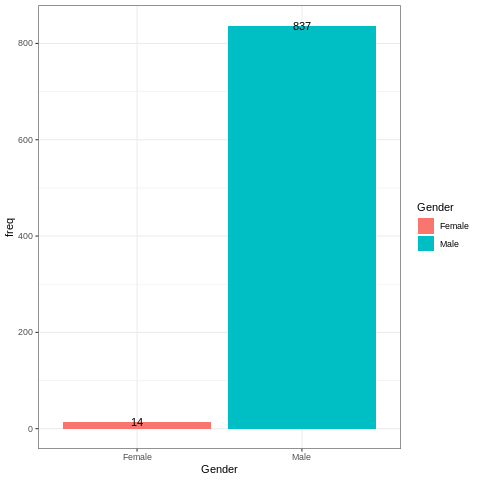

In [ ]:
%%R
mentions <- trymerge%>%filter(mention == "Yes")
gender <- mentions%>%group_by(Gender)%>%summarise(freq =n())
ggplot(data = gender, aes(x = Gender, y = freq, fill = Gender))+ geom_bar(stat = "identity")+geom_text(aes(label = freq))+ 
      theme(legend.position="none")+theme_bw()

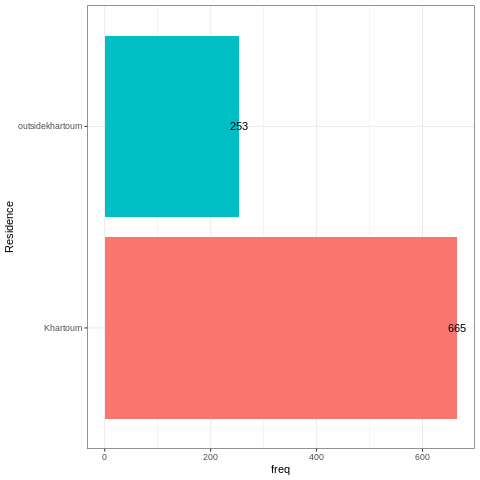

In [ ]:
%%R
residence <- mentions%>%group_by(Residence)%>%summarise(freq =n())
ggplot(data = residence, aes(x = , y = Residence, freq, fill = Residence))+ geom_bar(stat = "identity")+geom_text(aes(label = freq))+ 
      theme_bw()+theme(legend.position="none")

`summarise()` has grouped output by 'Residence'. You can override using the
`.groups` argument.


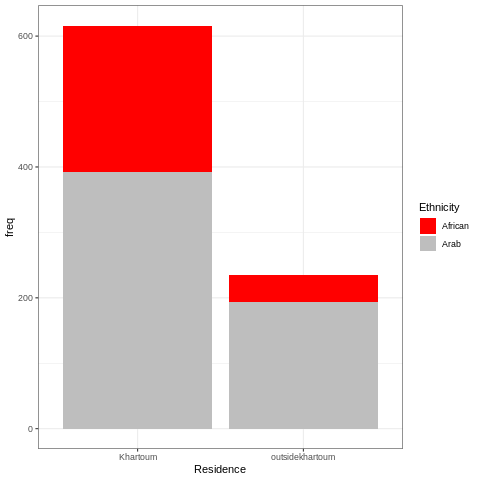

In [ ]:
%%R
residence_race <-mentions%>%group_by(Residence, Ethnicity)%>%summarise(freq = n())
ggplot(data = residence_race , aes(x = Residence, y = freq , fill = Ethnicity))+ geom_bar(stat = "identity")+theme_bw()+scale_fill_manual(values = c("red", "grey"))

In [ ]:
%%R
sympathymen <- mentions%>%filter(Discourse == "Sympathy")
escalationmen <- mentions%>%filter(Discourse == "Escalation")
announcementmen <- mentions%>%filter(Discourse == "Announcement")

`summarise()` has grouped output by 'Residence'. You can override using the
`.groups` argument.


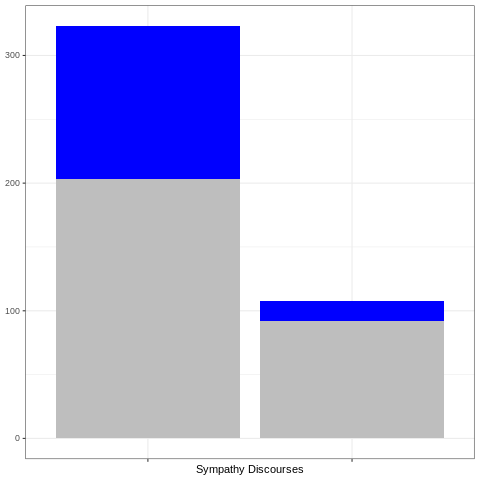

In [ ]:
%%R
residence_race <-sympathymen%>%group_by(Residence, Ethnicity)%>%summarise(freq = n())
p1 <-ggplot(data = residence_race , aes(x = Residence, y = freq , fill = Ethnicity))+ geom_bar(stat = "identity")+theme_bw()+scale_fill_manual(values = c("blue", "grey"))+theme(legend.position = "none", axis.text.x = element_blank(), axis.title.y = element_blank())+xlab("Sympathy Discourses")+ylab("Number of mentions")
p1

`summarise()` has grouped output by 'Residence'. You can override using the
`.groups` argument.


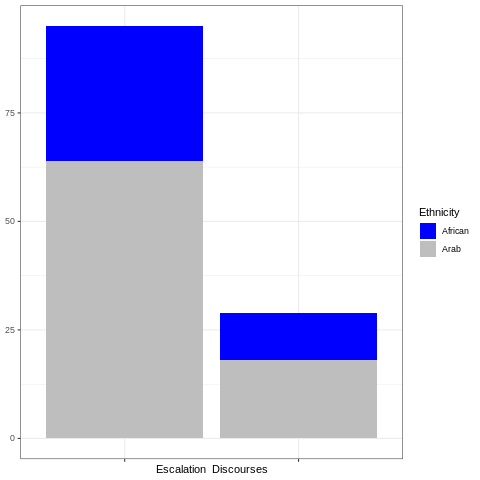

In [ ]:
%%R
residence_race <-escalationmen%>%group_by(Residence, Ethnicity)%>%summarise(freq = n())
p2 <-ggplot(data = residence_race , aes(x = Residence, y = freq , fill = Ethnicity))+ geom_bar(stat = "identity")+theme_bw()+scale_fill_manual(values = c("blue", "grey"))+theme( axis.title.y = element_blank(), axis.text.x = element_blank())+xlab("Escalation  Discourses")
p2

`summarise()` has grouped output by 'Residence'. You can override using the
`.groups` argument.


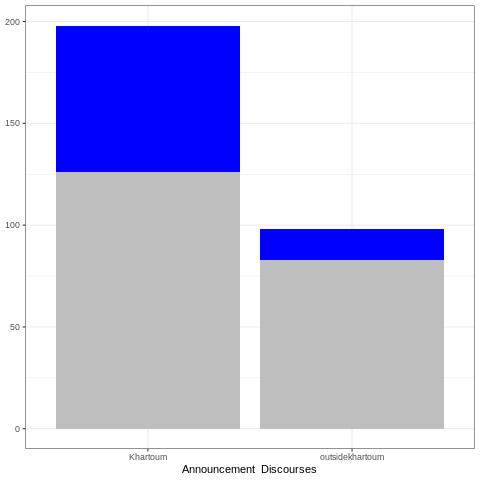

In [ ]:
%%R
residence_race <-announcementmen%>%group_by(Residence, Ethnicity)%>%summarise(freq = n())
p3 <-ggplot(data = residence_race , aes(x = Residence, y = freq , fill = Ethnicity))+ geom_bar(stat = "identity")+theme_bw()+scale_fill_manual(values = c("blue", "grey"))+theme(legend.position = "none", axis.title.y = element_blank())+xlab("Announcement  Discourses")
p3

In [ ]:
%%R
install.packages("patchwork")
library(patchwork)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpfNF24C/downloaded_packages’

Attaching package: ‘patchwork’



    area




In [ ]:
%%R
#Helping Function global from the patchwork library, reference: https://github.com/thomasp85/patchwork/issues/43
add_global_label <- function(pwobj, Xlab = NULL, Ylab = NULL, Xgap = 0.03, Ygap = 0.03, ...) {
  ylabgrob <- patchwork::plot_spacer()
  if (!is.null(Ylab)) {
    ylabgrob <- ggplot() +
      geom_text(aes(x = .5, y = .5), label = Ylab, angle = 90, ...) +
      theme_void()
  }
  if (!is.null(Xlab)) {
    xlabgrob <- ggplot() +
      geom_text(aes(x = .5, y = .5), label = Xlab, ...) +
      theme_void()
  }
  if (!is.null(Ylab) & is.null(Xlab)) {
    return((ylabgrob + patchworkGrob(pwobj)) + 
             patchwork::plot_layout(widths = 100 * c(Ygap, 1 - Ygap)))
  }
  if (is.null(Ylab) & !is.null(Xlab)) {
    return((ylabgrob + pwobj) + 
             (xlabgrob) +
             patchwork::plot_layout(heights = 100 * c(1 - Xgap, Xgap),
                                    widths = c(0, 100),
                                    design = "
                                   AB
                                   CC
                                   "
             ))
  }
  if (!is.null(Ylab) & !is.null(Xlab)) {
    return((ylabgrob + pwobj) + 
             (xlabgrob) +
             patchwork::plot_layout(heights = 100 * c(1 - Xgap, Xgap),
                                    widths = 100 * c(Ygap, 1 - Ygap),
                                    design = "
                                   AB
                                   CC
                                   "
             ))
  }
  return(pwobj)
}


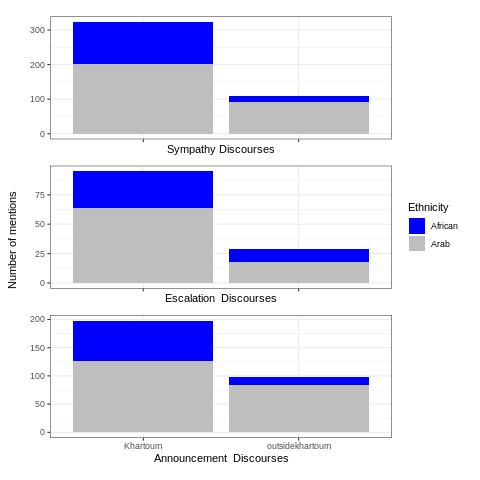

In [ ]:
%%R
add_global_label((p1/p2/p3), Ylab = "Number of mentions")

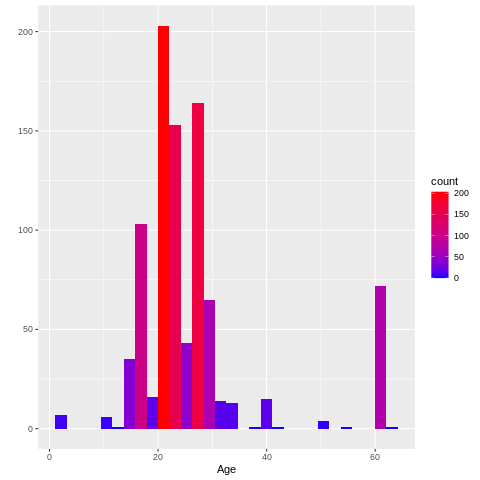

In [ ]:
%%R
qplot(x = Age, fill = , fill=..count.., geom="histogram" , data = mentions)+scale_fill_gradient(low="blue", high="red")

In [ ]:
%%R
summary(m12)


Call:
glm(formula = mention.ref ~ Gender + Age + Political.affiliation + 
    Residence + Race, family = "binomial", data = trymerge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9686   0.0324   0.0381   0.0487   0.0606  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               7.36724    0.32356  22.769  < 2e-16 ***
GenderMale               -0.47276    0.29883  -1.582   0.1136    
Age                      -0.01286    0.00324  -3.970 7.18e-05 ***
Political.affiliationyes  0.16399    0.12103   1.355   0.1754    
Residenceoutsidekhartoum  0.80326    0.07596  10.575  < 2e-16 ***
RaceArab                  0.17501    0.07784   2.248   0.0246 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 13224  on 950261  degrees of freedom
Residual deviance: 13074  on 950256  degrees of freedom
AIC: 13086

Number of Fisher Scoring

We can say that living outside Khartoum multiplies the odds of a tweet mentioning a decaesed demonstrator by (e^coef - 1)*100, holding others constant 
being Arab mulyiplies the odds of a tweet mentioning a deceased demonstrators by 22%
being affiliated with a politcial party multiplies the odds of a tweet to be mentioning a deceased demonstrator by 48%

In [ ]:
%%R
head(new_data)

       Age Gender       Residence Race Political.affiliation      pros
1 3.000000   Male outsidekhartoum Arab                   yes 0.9997590
2 3.122244   Male outsidekhartoum Arab                   yes 0.9997585
3 3.244489   Male outsidekhartoum Arab                   yes 0.9997581
4 3.366733   Male outsidekhartoum Arab                   yes 0.9997576
5 3.488978   Male outsidekhartoum Arab                   yes 0.9997572
6 3.611222   Male outsidekhartoum Arab                   yes 0.9997567


In [ ]:
%%R
new_data <- data.frame(Residence = sample(c('outsidekhartoum', 'Khartoum'), 500, replace=TRUE))
new_data <- new_data%>%mutate(Gender = sample(c('Female', 'Male'), 500, replace=TRUE))
new_data <- new_data%>%mutate(Age = mean(trymerge$Age))
new_data <- new_data%>%mutate(Race = "African")
new_data <- new_data%>%mutate(Political.affiliation = "No")
new_data$pros = predict(m12, new_data, type="response")

In [ ]:
%%R
ggplot(newdata3, aes(x = gre, y = PredictedProb)) + geom_ribbon(aes(ymin = LL,
    ymax = UL, fill = rank), alpha = 0.2) + geom_line(aes(colour = rank),
    size = 1)


          Residence Gender      Age    Race Political.affiliation      pros
1          Khartoum Female 25.10473 African                    No 0.9992690
2   outsidekhartoum Female 25.10473 African                    No 0.9997446
3          Khartoum Female 25.10473 African                    No 0.9992690
4   outsidekhartoum Female 25.10473 African                    No 0.9997446
5          Khartoum Female 25.10473 African                    No 0.9992690
6   outsidekhartoum Female 25.10473 African                    No 0.9997446
7          Khartoum Female 25.10473 African                    No 0.9992690
8   outsidekhartoum Female 25.10473 African                    No 0.9997446
9   outsidekhartoum Female 25.10473 African                    No 0.9997446
10         Khartoum Female 25.10473 African                    No 0.9992690
11  outsidekhartoum Female 25.10473 African                    No 0.9997446
12  outsidekhartoum Female 25.10473 African                    No 0.9997446
13         K

In [ ]:
%%R

exp(coef(m12))

             (Intercept)               GenderMale                      Age 
            2002.1443572                0.4171732                0.9849124 
Political.affiliationyes Residenceoutsidekhartoum                 RaceArab 
               1.4868266                2.8639711                1.2206535 


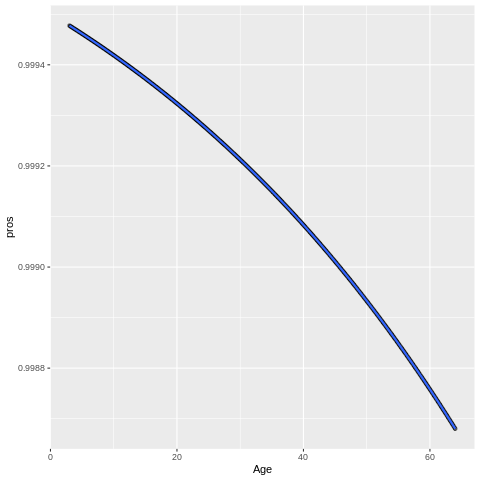

In [ ]:
%%R
ggplot(data = new_data, aes(x= Age, y= pros)) + 
  geom_point(alpha=.5) +
  stat_smooth(method="glm", se=FALSE, method.args = list(family=binomial))

In [ ]:
%%R
m14 <- glm(mention.ref ~Age, data = trymerge, family ="binomial")
summary(m14)


Call:
glm(formula = mention.ref ~ Age, family = "binomial", data = trymerge)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7992   0.0422   0.0432   0.0445   0.0553  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  7.252478   0.085164  85.159  < 2e-16 ***
Age         -0.012052   0.002966  -4.063 4.85e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14582  on 950870  degrees of freedom
Residual deviance: 14567  on 950869  degrees of freedom
AIC: 14571

Number of Fisher Scoring iterations: 9



In [ ]:
%%R
new <- data.frame(Age =seq(min(trymerge$Age), max(trymerge$Age),len=500))
new$pros = predict(m14, new, type="response")

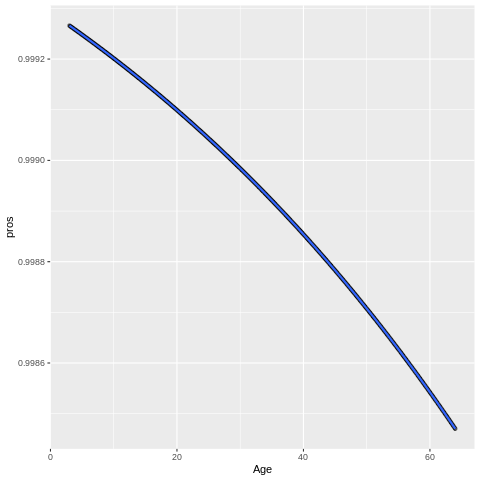

In [ ]:
%%R
ggplot(data = new, aes(x= Age, y= pros)) + 
  geom_point(alpha=.5) +
  stat_smooth(method="glm", se=FALSE, method.args = list(family=binomial))

In [ ]:
%%R
mentions <- trymerge%>%filter(mention == "Yes")

In [ ]:
%%R
mentions%>%group_by(Gender)%>%summarise(freq = n())%>%mutate(effect = 100*freq/851)

# A tibble: 2 × 3
  Gender  freq effect
  <chr>  <int>  <dbl>
1 Female    14   1.65
2 Male     837  98.4 


In [ ]:
%%R
mentions%>%group_by(Residence)%>%summarise(freq = n())%>%mutate(effect = 100*freq/851)

# A tibble: 2 × 3
  Residence        freq effect
  <chr>           <int>  <dbl>
1 Khartoum          616   72.4
2 outsidekhartoum   235   27.6


In [ ]:
%%R
mentions%>%group_by(Race)%>%summarise(freq = n())%>%mutate(effect = 100*freq/851)

# A tibble: 2 × 3
  Race     freq effect
  <chr>   <int>  <dbl>
1 African   265   31.1
2 Arab      586   68.9


In [ ]:
%%R
mentions%>%group_by(Political.affiliation)%>%summarise(freq = n())%>%mutate(effect = 100*freq/851)

# A tibble: 2 × 3
  Political.affiliation  freq effect
  <chr>                 <int>  <dbl>
1 No                      791  92.9 
2 yes                      60   7.05


In [ ]:
%%R
mentions%>%group_by(Residence, Race)%>%summarise(freq = n())

`summarise()` has grouped output by 'Residence'. You can override using the
`.groups` argument.
# A tibble: 4 × 3
# Groups:   Residence [2]
  Residence       Race     freq
  <chr>           <chr>   <int>
1 Khartoum        African   223
2 Khartoum        Arab      393
3 outsidekhartoum African    42
4 outsidekhartoum Arab      193
